In [92]:
# Importing essential libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [94]:
# converting csv to Dataframe using pandas

df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [96]:
# displaying the 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [98]:
# converting the Drop timestamp and Request timestamp into date time format

df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],format='mixed',dayfirst=True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],format='mixed',dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [102]:
# checking if there are any duplicate rows in the DataFrame

df.duplicated().any()

False

In [88]:
#  checking how many null values we have

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [90]:
#  counting the number of rides cancelled by the status of the trip 

statuscount=df[["Request id","Status"]].groupby("Status").count()
statuscount

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


### "Driver id" column has 2650 missing as shown above but this is equal to the "No cars Available" trip status, hence there are no missing values "Drop Timestamp" columns has 3914 missing values which is the sum of "No cars Available" ,2650 + 1264 for "Cancelled" We can see that there is no missing data as such n the dataset

array([<Axes: ylabel='Request id'>], dtype=object)

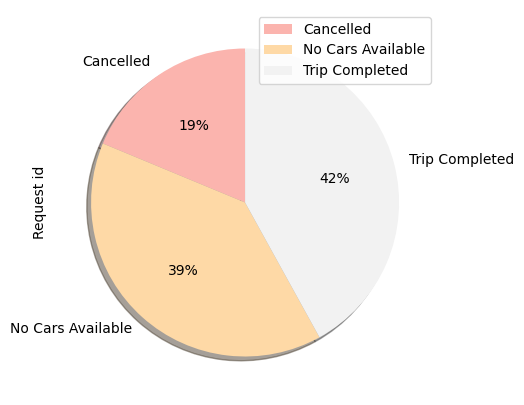

In [100]:
# plotting the piechart for how much percentage of trips get cancelled  

df[["Request id","Status"]].groupby("Status").count().plot(kind="pie",subplots=True,autopct='%1.0f%%', shadow=True, startangle=90, figsize=[5,5],colormap="Pastel1")

### As shown in the above graph this is a very big supply demand gap Only 42 percent of the total trip requests are being completed. There are a total of 19 percent trips that are being cancelled by the driver There are 39 percent trip requests which are being turned down due to unavailabiltity of cars Hence a bigger problem is car unavailability and need to be tackled depending on the where the request is coming from , Airport or city. Trip Status: Airpot to City and City to Aiport

In [104]:
#Extracting the hour from requested timestamp

df["Request hour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [201]:
bins = np.arange(0,25,1)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

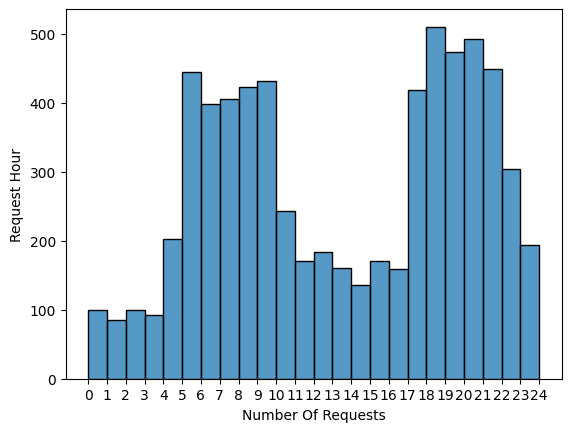

In [207]:
# plotting the histogram for at which hour trip gets requested

sns.histplot(x=df["Request hour"],edgecolor='black',bins=bins)
plt.xlabel("Number Of Requests")
plt.ylabel("Request Hour")
plt.xticks(np.arange(0,25,1))
plt.show()

In [131]:
# Extract the day from requested timestamp

df['Day'] = df['Request timestamp'].dt.day_name()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday


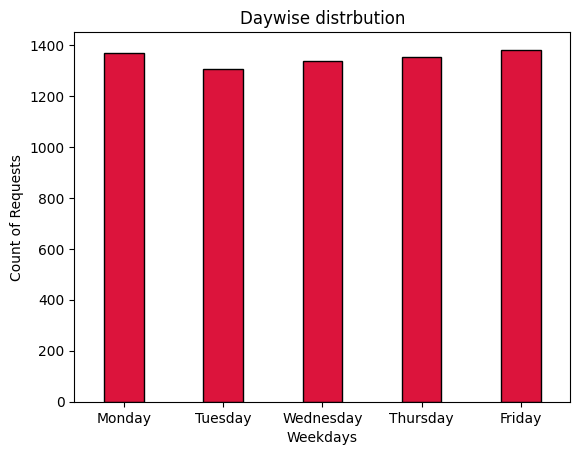

In [209]:
# countplot to show daywise disrbution

sns.countplot(x="Day",data=df,color="crimson",width=0.4,saturation=5.75,legend='auto',edgecolor='black')
plt.xlabel("Weekdays")
plt.ylabel("Count of Requests")
plt.title("Daywise distrbution")
plt.show()

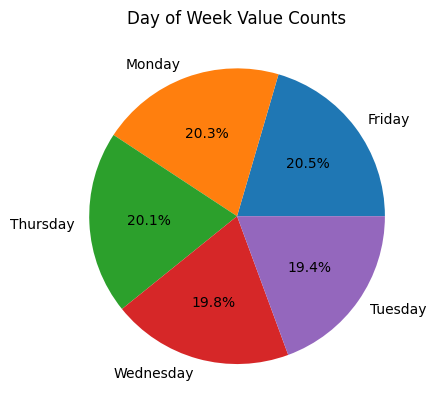

In [252]:
# Get the value counts for the Day of Week column
day_counts = df['Day'].value_counts()

# Create a pie chart of the value counts
plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Day of Week Value Counts')
plt.show()

## Insights:

### The peak number of requests on a particular day are as follows:

Wednesday with 2644 requests

Friday with 1381 requests

Monday with 1367 requests

Thursday with 1353 requests

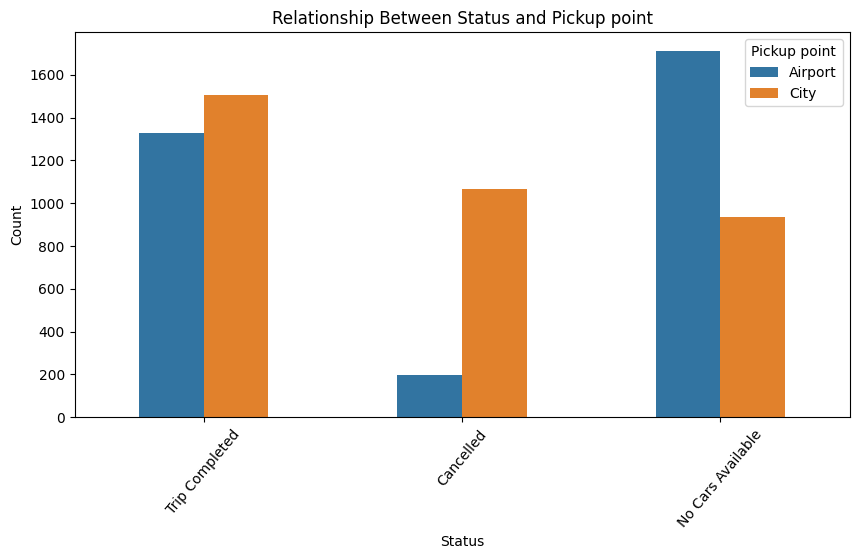

In [247]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Status", hue='Pickup point',width=0.5) 
plt.title(f'Relationship Between Status and Pickup point')
plt.xlabel("Status")
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

### As we can see there is big supply demand gap in airport because there no cars available on the airport at the rush hours

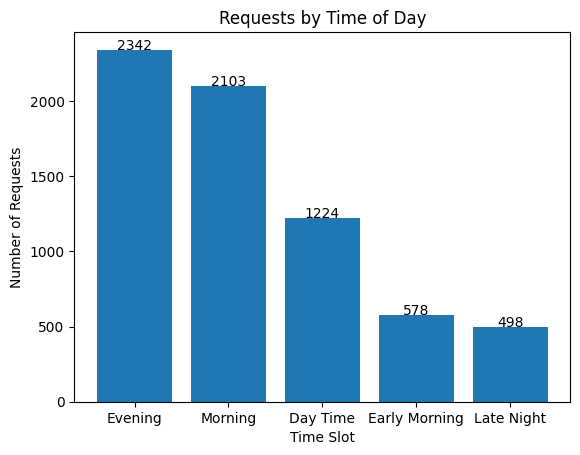

In [257]:
def get_time_period(hour):
    if hour < 5:
        return "Early Morning"
    elif 5 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 17:
        return "Day Time"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Late Night"

df['Time slot'] = df['Request hour'].apply(get_time_period)
time_slot_counts = df['Time slot'].value_counts()

import matplotlib.pyplot as plt
plt.bar(time_slot_counts.index, time_slot_counts.values)
plt.title("Requests by Time of Day")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

for i, v in enumerate(time_slot_counts.values):
    plt.text(i, v, str(v), ha='center')
plt.show()

## Insights:¶

The highest rush hours are in the evening with 2342 requests

followed by the morning with 2342 requests.

The least rush time is late night with only 498 requests.